In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [70]:
import pandas as pd
import numpy as np
import plotly
np.random.seed(0)
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv') # ,sep=';')

In [72]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [159]:
# Suppose the target is a binary variable
for i in range(len(df['quality'])):
    if df['quality'][i]<=4:
        df['quality'][i]='Low'
    elif df['quality'][i]<=6:
        df['quality'][i]='Medium'
    else:
        df['quality'][i]='High'
y = pd.get_dummies(df['quality'])
y.columns

TypeError: '<=' not supported between instances of 'str' and 'int'

In [160]:
y.columns

Index(['High', 'Low', 'Medium'], dtype='object')

In [74]:
df.shape,y.shape
y['High'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [75]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium


In [76]:
y.values

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [78]:
Y=y.copy()
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
X_train, X_test, Y_train_1, Y_test_1 = train_test_split(X, Y.values,random_state=10, test_size = 0.2)
model1 = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
model1.fit(X_train, Y_train_1)
print(model1.feature_importances_)

[0.05790618 0.13031236 0.08855695 0.07754598 0.04853377 0.06071269
 0.08555295 0.07531868 0.05186134 0.13520796 0.18849115]


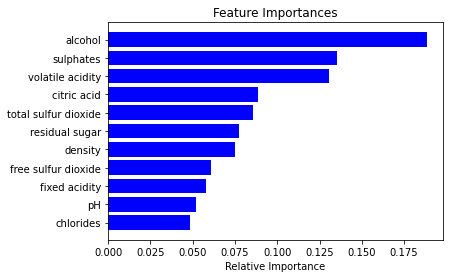

In [79]:
importances1 = model1.feature_importances_
indices1 = np.argsort(importances1)
features = X_train.columns
#plt.figure(figsize=(15, 15))
#plt.subplot(1,5,1)
plt.title('Feature Importances')
plt.barh(range(len(indices1)), importances1[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), [features[i] for i in indices1])
plt.xlabel('Relative Importance')
plt.show()

In [156]:
model1.

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

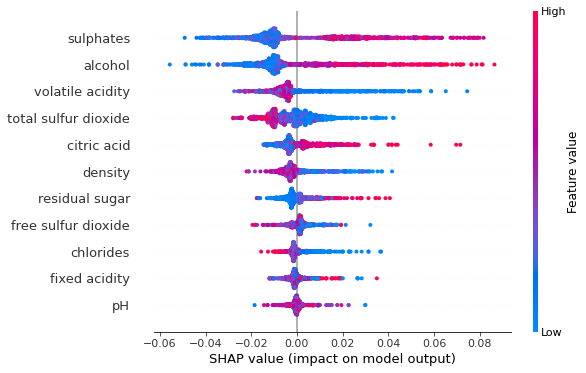

In [165]:
import shap
shap_values1 = shap.TreeExplainer(model1).shap_values(X_train)
shap.summary_plot(shap_values1[1], X_train,class_names=['non_High','High','n_l','Low','n_m','Medium'])
#shap.summary_plot(shap_values1[3], X_train)
#shap.summary_plot(shap_values1[5], X_train)

In [146]:
shap.TreeExplainer(model1).model_output

'raw'

In [100]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
data_for_prediction_array

array([[ 9.1    ,  0.4    ,  0.57   ,  4.6    ,  0.08   ,  6.     ,
        20.     ,  0.99652,  3.28   ,  0.57   , 12.5    ]])

In [168]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1518,7.4,0.47,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5
1246,7.4,0.74,0.07,1.7,0.086,15.0,48.0,0.99502,3.12,0.48,10.0
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4
1343,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5
428,9.1,0.52,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3


In [170]:

l=model1.predict_proba(X_test.iloc[[0]])
#k=[np.argmax(item)for item in l]
#k
#model1.predict(X_output)
l

[array([[0.94399562, 0.05600438]]),
 array([[0.97800464, 0.02199536]]),
 array([[0.07799975, 0.92200025]])]

In [172]:
Y_test_1[0]

array([0, 0, 1], dtype=uint8)

In [115]:
y['High'].mean(),y['Low'].mean(),y['Medium'].mean()

(0.1357098186366479, 0.039399624765478425, 0.8248905565978737)

In [120]:
l=model1.predict(X_train)
[]

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [174]:
explainerModel = shap.TreeExplainer(model1)
shap_values_Model = explainerModel.shap_values(data_for_prediction_array)
explainerModel.expected_value

array([0.28908001, 0.04425332, 0.31996351, 0.01336982, 0.05762314,
       0.27571019])

In [ ]:
shap.initjs()
def shap_plot(j,c):
    explainerModel = shap.TreeExplainer(model1)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value[c], shap_values_Model[c][j], S.iloc[[j]])
    return(p)

In [136]:
shap_plot(0,0)

In [127]:
shap_plot(0,1)

In [130]:
shap_plot(0,2)

In [128]:
shap_plot(0,3)

In [131]:
shap_plot(0,4)

In [129]:
shap_plot(0,5)

In [ ]:
#Y_test_1
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_1,l)

In [ ]:

#k=[item[1] for item in l]
#X_output.loc[:,'predict'] = k
#l

In [ ]:
X_output = X_test.copy()
l=model1.predict_proba(X_output)
#k=[item[1] for item in l]
X_output.loc[:,'predict'] = k

random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]
S

In [ ]:
shap.initjs()
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model1)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value[1], shap_values_Model[1][j], S.iloc[[j]])
    return(p)

In [ ]:
shap_plot(0)

In [ ]:
Y=y.copy()
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
X_train, X_test, Y_train_1, Y_test_1 = train_test_split(X, Y['High'].values,random_state=10, test_size = 0.2)
X_train, X_test, Y_train_2, Y_test_2 = train_test_split(X, Y['Low'].values,random_state=10, test_size = 0.2)
X_train, X_test, Y_train_3, Y_test_3 = train_test_split(X, Y['Medium'].values,random_state=10, test_size = 0.2)
model1 = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
model2 = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
model3 = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
model1.fit(X_train, Y_train_1)
model2.fit(X_train, Y_train_2)  
model3.fit(X_train, Y_train_3)  
print(model1.feature_importances_)
print(model2.feature_importances_)
print(model3.feature_importances_)

In [ ]:

importances1 = model1.feature_importances_
indices1 = np.argsort(importances1)
importances2 = model2.feature_importances_
indices2 = np.argsort(importances2)
importances3 = model3.feature_importances_
indices3 = np.argsort(importances3)
features = X_train.columns
#plt.figure(figsize=(15, 15))
#plt.subplot(1,5,1)
plt.title('Feature Importances')
plt.barh(range(len(indices1)), importances1[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), [features[i] for i in indices1])
plt.xlabel('Relative Importance')
plt.show()
#plt.subplot(1,3,2)
plt.title('Feature Importances')
plt.barh(range(len(indices2)), importances2[indices2], color='b', align='center')
plt.yticks(range(len(indices2)), [features[i] for i in indices2])
plt.xlabel('Relative Importance')
plt.show()
#plt.subplot(1,3,3)
plt.title('Feature Importances')
plt.barh(range(len(indices3)), importances3[indices3], color='b', align='center')
plt.yticks(range(len(indices3)), [features[i] for i in indices3])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import shap
shap_values1 = shap.TreeExplainer(model1).shap_values(X_train)
shap.summary_plot(shap_values1[1], X_train)
import shap
shap_values2 = shap.TreeExplainer(model2).shap_values(X_train)
shap.summary_plot(shap_values2[1], X_train)
import shap
shap_values3 = shap.TreeExplainer(model3).shap_values(X_train)
shap.summary_plot(shap_values3[1], X_train)

In [ ]:
X_output = X_test.copy()
l=model2.predict_proba(X_output).tolist()
k=[item[1] for item in l]
X_output.loc[:,'predict'] = k

random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]
S

In [ ]:
S['predict'].mean()

In [ ]:
shap.initjs()
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model1)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value[1], shap_values_Model[1][j], S.iloc[[j]])
    return(p)

In [ ]:

shap.initjs()
explainerModel = shap.TreeExplainer(model1)
shap_values_Model = explainerModel.shap_values(S)
explainerModel.expected_value

In [ ]:
X_train.mean()

In [ ]:
Y_test_1.mean()

In [ ]:
shap_plot(1)